<ipython-input-24-9c5129713bb1>:11: UserWarning: threshold_multiotsu is expected to work correctly only for grayscale images; image shape (184, 247, 3) looks like that of an RGB image.
  thresholds = threshold_multiotsu(image, classes=5)


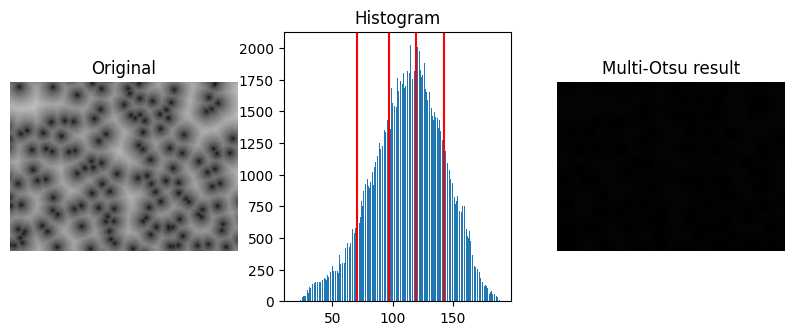

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import io, img_as_ubyte
from skimage.filters import threshold_multiotsu

# Read an image
image = io.imread("images.jpeg")

# Apply multi-Otsu threshold
thresholds = threshold_multiotsu(image, classes=5)

# Digitize (segment) original image into multiple classes.
regions = np.digitize(image, bins=thresholds)
output = img_as_ubyte(regions)

# Print unique values in the segmented regions
# unique_values = np.unique(regions)
# print("Unique values in the segmented regions:", unique_values)

# Let us look at the input image, thresholds on the histogram, and final segmented image
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result with a different colormap.
ax[2].imshow(regions, cmap='Accent')  # Experiment with different colormaps
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()
